# ARBOL DE DECISIÓN

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


# BAGGING CLASSIFIER

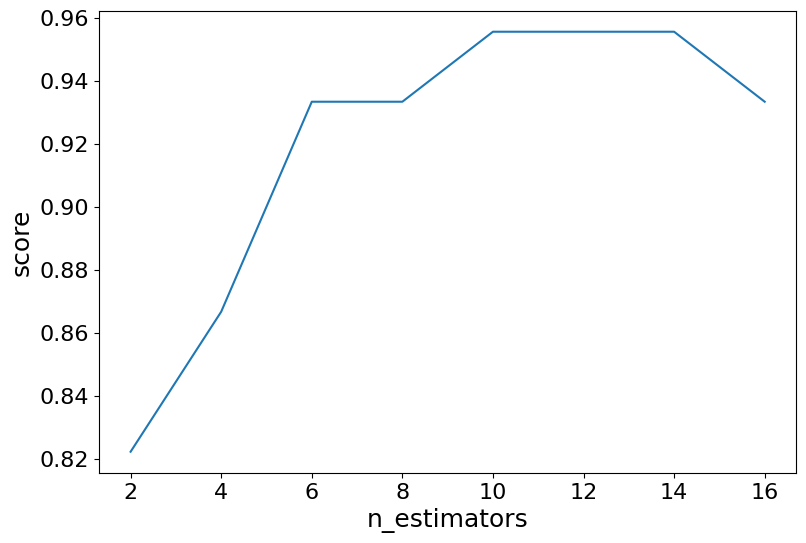

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

EL CODIGO DEL BLOQUE ANTERIOR:

Importa las librerías necesarias, incluyendo matplotlib para graficar, datasets de Scikit-learn para cargar conjuntos de datos integrados, train_test_split para dividir el conjunto de datos en conjuntos de entrenamiento y prueba, accuracy_score para calcular la precisión del clasificador y BaggingClassifier para crear un clasificador de ensamble Bagging.

Carga el conjunto de datos de vinos (load_wine) de Scikit-learn, configurando as_frame = True para cargar los datos como un DataFrame de Pandas. Esto proporciona un objeto data que contiene tanto las características como las etiquetas.

Divide el conjunto de datos en características (X) y etiquetas (y) y luego en conjuntos de entrenamiento y prueba usando train_test_split. En este caso, se reserva el 25% de los datos para el conjunto de prueba.

Define una lista de números de estimadores (estimator_range) que representan el número de clasificadores base utilizados en el ensamble Bagging.

Itera sobre cada número de estimadores en estimator_range. Para cada valor, se crea un clasificador Bagging con el número de estimadores especificado y se ajusta a los datos de entrenamiento.

Calcula la precisión del clasificador Bagging en el conjunto de prueba utilizando accuracy_score y lo almacena en la lista scores.

Grafica la relación entre el número de estimadores y la precisión del clasificador Bagging usando matplotlib.

Muestra la gráfica resultante.

# REGRESION LOGISTICA


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
#
# Load the breast cancer dataset
#
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
#
# Pipeline Estimator
#
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))
#
# Fit the model
#
pipeline.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %pipeline.score(X_test, y_test),
      'Model training Score: %.3f' %pipeline.score(X_train, y_train))

Model test Score: 0.965,  Model training Score: 0.991


# BAGGING CON LR

In [ ]:
#
# Pipeline Estimator
#
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))
#
# Instantiate the bagging classifier
#
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
#
# Fit the bagging classifier
#
bgclassifier.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model test Score: 0.958,  Model training Score: 0.972


# BAGGING REGRESION

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Carga el dataset de California Housing
housing = fetch_california_housing()

# Convierte el dataset en un DataFrame de Pandas
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MEDV'] = housing.target

# Divide el DataFrame en características (X) y etiquetas (y)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Divide los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea una lista de modelos
models = [
    ('decision_tree', DecisionTreeRegressor()),
    ('linear_regression', LinearRegression()),
    ('k_neighbors', KNeighborsRegressor(n_neighbors=5))
]

# Crea un modelo de ensamble con los modelos anteriores
model = VotingRegressor(models)

# Entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Evalúa el modelo en los datos de prueba
score = model.score(X_test, y_test)
print(f'Precisión del modelo en el conjunto de prueba: {score}')

# Hace una predicción con el modelo
sample_data = [[8.3252, 41.0, 6.98412698, 1.02380952, 322.0, 2.55555556, 37.88, -122.23]]  # Datos de ejemplo
prediction = model.predict(sample_data)
print(f'Predicción de MEDV para los datos de muestra: {prediction}')


Precisión del modelo en el conjunto de prueba: 0.6483255886232002
Predicción de MEDV para los datos de muestra: [3.37018156]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


# GRADIENT BOOSTING

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns = cancer["feature_names"])
y = cancer["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(tree.score(X_test, y_test))

from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)
print(gbrt.score(X_test, y_test))

0.8951048951048951
0.965034965034965
